In [170]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.0f}'.format
pd.options.display.max_columns = None

In [8]:
with zipfile.ZipFile('/Users/toddhendricks/Downloads/SanFranciscoOaklandFremontCAMSA-TraderJoes-PATTERNS-2020_07-2020-08-21.zip', 'r') as zip_ref:
    zip_ref.extractall('tj')

In [54]:
bay_area_patterns = pd.read_csv('./tj/patterns.csv')

Clean date column

In [55]:
bay_area_patterns.date_range_start = bay_area_patterns.date_range_start.str.split('T')

In [62]:
bay_area_patterns['start'] = bay_area_patterns.date_range_start[0][0]
bay_area_patterns['start'] = pd.to_datetime(bay_area_patterns['start'])

In [67]:
covid_daily = pd.read_csv('/Users/toddhendricks/Downloads/daily.csv')

In [91]:
covid_daily['july_daily'] = covid_daily.date[covid_daily.date.astype('str').str.startswith('202007')]

In [199]:
bay_area_patterns.to_pickle('bap.pkl')

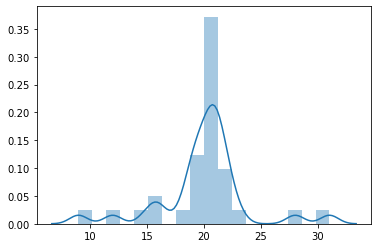

In [85]:
sns.distplot(bay_area_patterns.median_dwell.values)

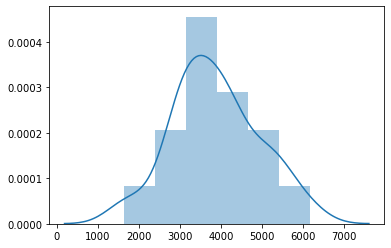

In [86]:
sns.distplot(bay_area_patterns.distance_from_home.values)

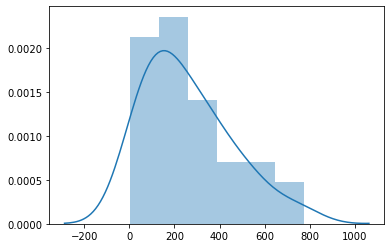

In [88]:
sns.distplot(bay_area_patterns.raw_visitor_counts.values)

In [96]:
covid_daily = covid_daily.sort_values(by='date')
covid_daily.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'deathConfirmed', 'deathProbable',
       'totalTestEncountersViral', 'totalTestsPeopleViral',
       'totalTestsAntibody', 'positiveTestsAntibody', 'negativeTestsAntibody',
       'totalTestsPeopleAntibody', 'positiveTestsPeopleAntibody',
       'negativeTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'positiveTestsPeopleAntigen', 'totalTestsAntigen',
       'positiveTestsAntigen', 'fips', 'positiveIncrease', 'negativeIncrease',
       'total', 'totalTestResults', 'totalTestResultsIncrease', 'posNeg',
       'deathIncrease', 'hospitalizedIn

In [114]:
covid_daily
# sns.lineplot(x=list(range(len(cumulative_hospitalized))), y=cumulative_hospitalized)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,july_daily
169,20200304,CA,53,462,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,c8968292205779a6aea6aa17e6f12855ff41b680,0,0,0,0,0,NaN,NaN
168,20200305,CA,53,462,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,34f463b86e648180ffe7c76cf7aefe5d85b9db30,0,0,0,0,0,NaN,NaN
167,20200306,CA,60,462,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,606738ed44474e389b9c55b0d6e1d57790a6d84b,0,0,0,0,0,NaN,NaN
166,20200307,CA,69,462,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,612e9bcf01d47f5a6ff3e694d42047d0d8d063ec,0,0,0,0,0,NaN,NaN
165,20200308,CA,88,462,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,12c7f40b8c4d869d273ab0e20883127208a6711b,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,20200816,CA,621562,9176573,NaN,6309.0,NaN,1820.0,NaN,NaN,...,77,0,331bcdae83c24788c6a9f946ffb2bc2d6c7c32b3,0,0,0,0,0,NaN,NaN
3,20200817,CA,628031,9305749,NaN,6332.0,NaN,1811.0,NaN,NaN,...,18,0,6f7007ec6621a98afb63d530c23a2bcaa8e42209,0,0,0,0,0,NaN,NaN
2,20200818,CA,632667,9416372,NaN,6360.0,NaN,1801.0,NaN,NaN,...,100,0,44203a48ca8861a04dc88e9ec8d7dc05627c20c9,0,0,0,0,0,NaN,NaN
1,20200819,CA,638831,9501852,NaN,6479.0,NaN,1761.0,NaN,NaN,...,181,0,cbc3e20131349d23d0fffe1218beee47064d0ef7,0,0,0,0,0,NaN,NaN


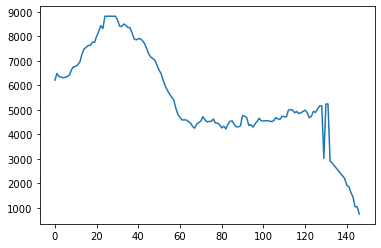

In [120]:
plt.plot(covid_daily.hospitalizedCurrently)
plt.show()

In [126]:
covid_daily.totalTestsAntigen.isnull()

169    True
168    True
167    True
166    True
165    True
       ... 
4      True
3      True
2      True
1      True
0      True
Name: totalTestsAntigen, Length: 170, dtype: bool

In [128]:
norm = pd.read_csv('./tj/normalization_stats.csv')

In [129]:
norm.columns

Index(['year', 'month', 'day', 'region', 'total_visits', 'total_devices_seen',
       'total_home_visits', 'total_home_visitors'],
      dtype='object')

In [131]:
california_norm = norm[norm['region'] == 'ca']

In [157]:
visit_sum = pd.read_csv('./tj/visit_panel_summary.csv', low_memory=False)

In [158]:
california_visit_summary = visit_sum[visit_sum['state'] == 'ca']

In [159]:
california_visit_summary

,year,month,state,num_visits,num_unique_visitors
7,2020,7,ca,65281376,3117201


In [160]:
health_atlas = pd.read_csv('/Users/toddhendricks/Downloads/Health_Atlas_Data.csv', low_memory=False)

In [161]:
health_atlas.covid_hospitalized_percap = health_atlas.covid_hospitalized_percap.str.strip()

In [177]:
bay = bay_area_patterns.city.to_list()

In [183]:
new_bay_df = pd.DataFrame()
for city in bay:
    if city in health_atlas['GEO.display-label']:
        new_bay_df.append(city)

In [190]:
new_bay_df = [city for city in health_atlas['GEO.display-label'] if city in bay]

In [198]:
group_by_region = health_atlas.groupby('GEO.display-label').sum().reset_index()
group_by_region.sort_values('food_insecurity', ascending=False)

,GEO.display-label,adults_50-75,all_retailers,civilian_noninst,families,families_under_5,food_insecurity,households,housing_units,labor_force,men_over65,num_65+,over_18,over_25,over_5,owner_occupied,pct_40-64,pct_bachelors,pct_eviction_filing_rate,pct_eviction_rate,pct_nothsgrad,pct_somecollege,pop_3to4,poverty_determined,poverty_determined_over65,poverty_determined_under18,renter_occupied,total_pop,under_19,women_21-65,women_50-74,women_over65
2120,"Census Tract 2063, Los Angeles County, California","3,136",225,"5,468",42,0,55,"2,440","2,816","1,321",559,617,"5,366","5,270","5,417",16,70,9,10,9,30,36,12,"5,416",617,44,"2,424","5,468",102,"1,289",749,58
2452,"Census Tract 2227, Los Angeles County, California",17,67,"4,145",8,0,54,130,158,"1,220",0,0,"2,365",51,"4,145",0,0,26,1,1,0,76,0,394,0,0,130,"4,145","1,780",271,8,0
6296,"Census Tract 5716, Los Angeles County, California",279,24,"2,199",565,40,49,795,814,775,50,135,"1,204",942,"1,943",31,19,6,4,4,26,40,153,"2,187",135,956,764,"2,199",995,676,191,85
5877,"Census Tract 53.01, Sacramento County, California",240,65,"1,299",249,74,48,450,512,381,4,34,868,815,"1,173",11,27,6,5,5,24,31,103,"1,223",34,380,439,"1,354",486,391,84,30
2463,"Census Tract 2247, Los Angeles County, California",179,69,"6,450",81,0,45,949,"1,106","2,746",18,22,"5,823",729,"6,450",13,3,65,1,1,8,82,0,"2,797",22,21,936,"6,450",627,"1,543",96,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337,"Census Tract 42.15, Fresno County, California",983,12,"4,695","1,222",129,0,"1,422","1,481","2,487",134,367,"3,341","2,795","4,417","1,022",30,25,2,2,7,63,82,"4,706",367,"1,301",400,"4,706","1,365","1,523",581,233
459,"Census Tract 11.02, Santa Barbara County, Cali...",865,26,"4,899",920,149,0,"1,359","1,437","2,728",138,297,"3,569","2,829","4,502",239,27,24,0,0,40,44,127,"4,899",297,"1,273","1,120","4,923","1,354","1,306",431,159
458,"Census Tract 11.02, San Joaquin County, Califo...","1,202",19,"4,987","1,073",126,0,"1,958","2,166","2,461",311,649,"3,688","3,178","4,734",904,29,12,4,4,23,47,80,"4,987",649,"1,256","1,054","4,987","1,299","1,467",585,338
4336,"Census Tract 42.14, Fresno County, California","1,841",19,"4,674","1,279",12,0,"1,922","1,929","2,154",534,"1,270","3,813","3,565","4,555","1,432",38,33,0,0,9,74,87,"4,654","1,260",795,490,"4,704",891,"1,227","1,031",736


['San Mateo', 'Alameda', 'San Francisco']